# Decision Trees with Gini Impurity: A Complete Guide

**Learning Objectives:**
- Understand the intuition behind decision trees
- Learn how Gini Impurity measures node purity
- Implement decision tree algorithms from scratch
- Visualize decision boundaries and tree structures
- Compare with scikit-learn implementations

**Why Decision Trees?**
- **Interpretable**: Easy to understand and explain
- **No assumptions**: Works with any type of data
- **Feature selection**: Automatically identifies important features
- **Handles missing data**: Can work with incomplete datasets
- **Foundation**: Basis for Random Forests and Gradient Boosting

Let's build our understanding step by step!

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Set style for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

print("Welcome to Decision Trees with Gini Impurity")
print("We will learn how computers make decisions using tree-based algorithms")

# Create a simple educational dataset
np.random.seed(42)

# Create a toy dataset for weather prediction
weather_data = {
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Hot', 'Mild', 'Cool'],
    'Humidity': ['High', 'High', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'High', 'Normal', 'High', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play_Tennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df_weather = pd.DataFrame(weather_data)
print("\nTennis Playing Decision Dataset:")
print("This classic dataset helps decide whether to play tennis based on weather conditions")
print(df_weather.head(10))

Welcome to Decision Trees with Gini Impurity
We will learn how computers make decisions using tree-based algorithms

Tennis Playing Decision Dataset:
This classic dataset helps decide whether to play tennis based on weather conditions
  Temperature Humidity    Wind Play_Tennis
0         Hot     High    Weak          No
1         Hot     High  Strong          No
2         Hot   Normal    Weak         Yes
3        Mild     High    Weak         Yes
4        Cool   Normal    Weak         Yes
5        Cool   Normal  Strong          No
6        Cool   Normal  Strong         Yes
7        Mild     High    Weak          No
8        Cool   Normal    Weak         Yes
9        Mild   Normal    Weak         Yes


## Understanding Gini Impurity

**What is Gini Impurity?**
Gini Impurity measures how "impure" or "mixed" a set of examples is. It answers the question: *"If I randomly pick an example and randomly guess its class, what's the probability I'll be wrong?"*

**Mathematical Formula:**
```
Gini Impurity = 1 - Σ(pi)²
```
Where pi is the probability of class i

**Intuition:**
- **Gini = 0**: Perfect purity (all examples belong to same class)
- **Gini = 0.5**: Maximum impurity for binary classification (50-50 split)
- **Lower Gini**: Better, more pure node

**Example:**
- 100 examples: 90 "Yes", 10 "No"
- p(Yes) = 0.9, p(No) = 0.1  
- Gini = 1 - (0.9² + 0.1²) = 1 - (0.81 + 0.01) = 0.18

Let's implement this step by step!

GINI IMPURITY EXAMPLES
Example 1 - All 'Yes': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
Gini Impurity: 0.000 (Perfect purity!)

Example 2 - Equal split: ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No']
Gini Impurity: 0.500 (Maximum impurity for binary)

Example 3 - Tennis dataset: ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
Gini Impurity: 0.459

Tennis Dataset Analysis:
Yes: 9/14 = 0.643
No: 5/14 = 0.357
Manual Gini = 1 - (0.643² + 0.357²)
Manual Gini = 1 - (0.413 + 0.128)
Manual Gini = 1 - 0.541 = 0.459


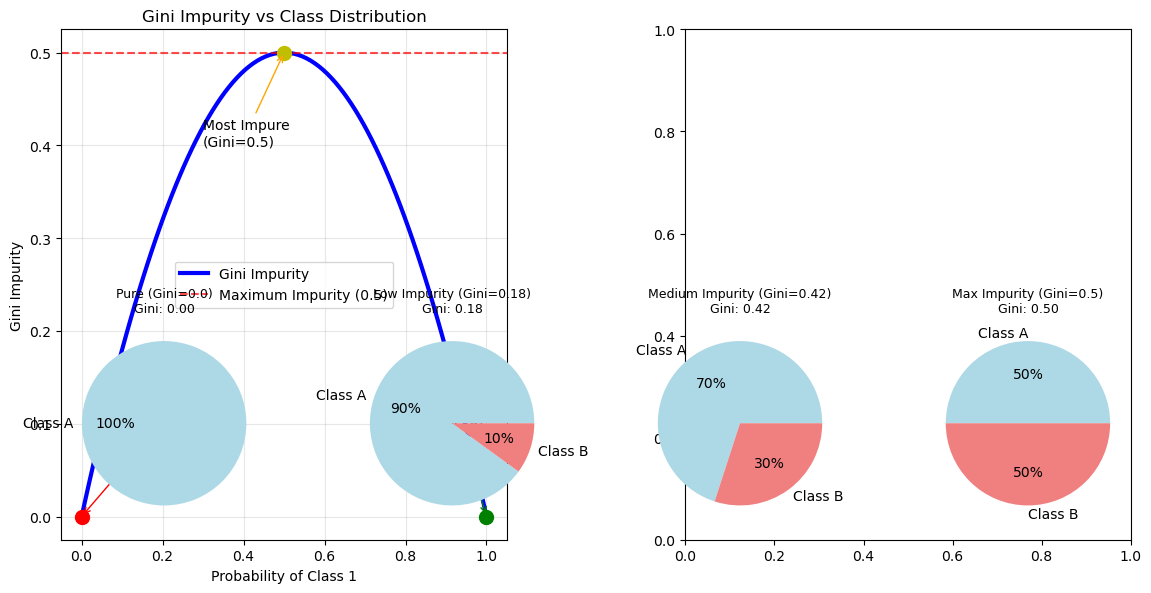


Key Insight: Gini Impurity helps us measure how 'mixed up' our data is.
Lower Gini = Better for decision making


In [14]:
def calculate_gini_impurity(labels):
    """
    Calculate Gini Impurity for a set of labels.
    
    Args:
        labels: List or array of class labels
    
    Returns:
        float: Gini impurity value (0 = pure, higher = more impure)
    """
    if len(labels) == 0:
        return 0
    
    # Count occurrences of each class
    unique_classes, counts = np.unique(labels, return_counts=True)
    
    # Calculate probabilities
    probabilities = counts / len(labels)
    
    # Calculate Gini Impurity: 1 - Σ(pi²)
    gini = 1.0 - np.sum(probabilities ** 2)
    
    return gini

# Let's test our Gini calculation with examples
print("GINI IMPURITY EXAMPLES")
print("=" * 50)

# Example 1: Perfect purity (all same class)
labels1 = ['Yes'] * 10
gini1 = calculate_gini_impurity(labels1)
print(f"Example 1 - All 'Yes': {labels1}")
print(f"Gini Impurity: {gini1:.3f} (Perfect purity!)")

# Example 2: Maximum impurity (50-50 split)
labels2 = ['Yes'] * 5 + ['No'] * 5
gini2 = calculate_gini_impurity(labels2)
print(f"\nExample 2 - Equal split: {labels2}")
print(f"Gini Impurity: {gini2:.3f} (Maximum impurity for binary)")

# Example 3: Our tennis dataset
tennis_labels = df_weather['Play_Tennis'].tolist()
gini3 = calculate_gini_impurity(tennis_labels)
print(f"\nExample 3 - Tennis dataset: {tennis_labels}")
print(f"Gini Impurity: {gini3:.3f}")

# Let's analyze the tennis dataset distribution
yes_count = tennis_labels.count('Yes')
no_count = tennis_labels.count('No')
total = len(tennis_labels)

print(f"\nTennis Dataset Analysis:")
print(f"Yes: {yes_count}/{total} = {yes_count/total:.3f}")
print(f"No: {no_count}/{total} = {no_count/total:.3f}")
print(f"Manual Gini = 1 - ({yes_count/total:.3f}² + {no_count/total:.3f}²)")
print(f"Manual Gini = 1 - ({(yes_count/total)**2:.3f} + {(no_count/total)**2:.3f})")
print(f"Manual Gini = 1 - {(yes_count/total)**2 + (no_count/total)**2:.3f} = {1 - ((yes_count/total)**2 + (no_count/total)**2):.3f}")

# Visualize Gini Impurity for different probability distributions
probabilities = np.linspace(0, 1, 100)
gini_values = [1 - (p**2 + (1-p)**2) for p in probabilities]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(probabilities, gini_values, 'b-', linewidth=3, label='Gini Impurity')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Maximum Impurity (0.5)')
plt.xlabel('Probability of Class 1')
plt.ylabel('Gini Impurity')
plt.title('Gini Impurity vs Class Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Mark special points
plt.plot(0, 0, 'ro', markersize=10, label='Pure (Class 0)')
plt.plot(1, 0, 'go', markersize=10, label='Pure (Class 1)')
plt.plot(0.5, 0.5, 'yo', markersize=10, label='Maximum Impurity')

# Add annotations
plt.annotate('Pure\n(Gini=0)', xy=(0, 0), xytext=(0.15, 0.1),
            arrowprops=dict(arrowstyle='->', color='red'), fontsize=10)
plt.annotate('Pure\n(Gini=0)', xy=(1, 0), xytext=(0.85, 0.1),
            arrowprops=dict(arrowstyle='->', color='green'), fontsize=10)
plt.annotate('Most Impure\n(Gini=0.5)', xy=(0.5, 0.5), xytext=(0.3, 0.4),
            arrowprops=dict(arrowstyle='->', color='orange'), fontsize=10)

plt.subplot(1, 2, 2)
# Pie charts showing different impurity levels
scenarios = [
    ([10, 0], "Pure (Gini=0.0)"),
    ([9, 1], "Low Impurity (Gini=0.18)"), 
    ([7, 3], "Medium Impurity (Gini=0.42)"),
    ([5, 5], "Max Impurity (Gini=0.5)")
]

for i, (counts, title) in enumerate(scenarios):
    plt.subplot(2, 4, i+5)
    labels = ['Class A', 'Class B']
    colors = ['lightblue', 'lightcoral']
    
    # Only show non-zero counts
    non_zero_counts = [c for c in counts if c > 0]
    non_zero_labels = [labels[j] for j, c in enumerate(counts) if c > 0]
    non_zero_colors = [colors[j] for j, c in enumerate(counts) if c > 0]
    
    plt.pie(non_zero_counts, labels=non_zero_labels, colors=non_zero_colors, autopct='%1.0f%%')
    gini = calculate_gini_impurity(['A']*counts[0] + ['B']*counts[1])
    plt.title(f"{title}\nGini: {gini:.2f}", fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nKey Insight: Gini Impurity helps us measure how 'mixed up' our data is.")
print(f"Lower Gini = Better for decision making")

## Information Gain: Choosing the Best Split

**What is Information Gain?**
Information Gain measures how much a split improves the purity of our data. It's the reduction in Gini Impurity after splitting.

**Formula:**
```
Information Gain = Gini(parent) - Σ(|child_i|/|parent| × Gini(child_i))
```

**Process:**
1. Calculate Gini Impurity of parent node
2. Split data based on a feature value
3. Calculate weighted Gini of child nodes
4. Information Gain = Parent Gini - Weighted Child Gini

**Goal:** Choose the split that gives the **highest Information Gain** (biggest reduction in impurity)

Let's see this in action with our tennis dataset!

In [15]:
def calculate_information_gain(parent_labels, left_labels, right_labels):
    """
    Calculate Information Gain from a split.
    
    Args:
        parent_labels: Labels before split
        left_labels: Labels in left child after split  
        right_labels: Labels in right child after split
    
    Returns:
        float: Information gain value
    """
    # Calculate parent Gini
    parent_gini = calculate_gini_impurity(parent_labels)
    
    # Calculate weighted Gini of children
    total_samples = len(parent_labels)
    left_weight = len(left_labels) / total_samples
    right_weight = len(right_labels) / total_samples
    
    left_gini = calculate_gini_impurity(left_labels)
    right_gini = calculate_gini_impurity(right_labels)
    
    weighted_child_gini = (left_weight * left_gini) + (right_weight * right_gini)
    
    # Information Gain = Parent Gini - Weighted Child Gini
    information_gain = parent_gini - weighted_child_gini
    
    return information_gain, parent_gini, weighted_child_gini, left_gini, right_gini

# Let's analyze splits for our tennis dataset
print("ANALYZING SPLITS FOR TENNIS DATASET")
print("=" * 60)

# First, let's see the distribution of our target variable
target = df_weather['Play_Tennis']
print(f"Original dataset distribution:")
print(target.value_counts())
print(f"Original Gini: {calculate_gini_impurity(target):.3f}")

print("\n" + "=" * 60)
print("TESTING DIFFERENT SPLITS")
print("=" * 60)

# Test splitting by Temperature
print("\n1. SPLITTING BY TEMPERATURE")
print("-" * 40)

temp_groups = df_weather.groupby('Temperature')
for temp_value, group in temp_groups:
    labels = group['Play_Tennis'].tolist()
    gini = calculate_gini_impurity(labels)
    count = len(labels)
    yes_count = labels.count('Yes')
    no_count = labels.count('No')
    print(f"Temperature = {temp_value:6}: {count:2} samples, Yes:{yes_count}, No:{no_count}, Gini: {gini:.3f}")

# Calculate information gain for Temperature splits
# For categorical variables, we test each value as a split
best_temp_gain = 0
best_temp_split = None

for temp_value in df_weather['Temperature'].unique():
    # Split: this temperature vs others
    mask = df_weather['Temperature'] == temp_value
    left_labels = df_weather[mask]['Play_Tennis'].tolist()
    right_labels = df_weather[~mask]['Play_Tennis'].tolist()
    
    if len(left_labels) > 0 and len(right_labels) > 0:  # Valid split
        gain, parent_gini, weighted_child, left_gini, right_gini = calculate_information_gain(
            target.tolist(), left_labels, right_labels
        )
        
        print(f"\nSplit: Temperature = '{temp_value}' vs Others")
        print(f"  Left ({temp_value}): {len(left_labels)} samples, Gini: {left_gini:.3f}")
        print(f"  Right (Others): {len(right_labels)} samples, Gini: {right_gini:.3f}")
        print(f"  Information Gain: {gain:.3f}")
        
        if gain > best_temp_gain:
            best_temp_gain = gain
            best_temp_split = temp_value

print(f"\nBest Temperature split: '{best_temp_split}' with gain: {best_temp_gain:.3f}")

# Test splitting by Humidity
print("\n\n2. SPLITTING BY HUMIDITY")
print("-" * 40)

humidity_groups = df_weather.groupby('Humidity')
for humidity_value, group in humidity_groups:
    labels = group['Play_Tennis'].tolist()
    gini = calculate_gini_impurity(labels)
    count = len(labels)
    yes_count = labels.count('Yes')
    no_count = labels.count('No')
    print(f"Humidity = {humidity_value:6}: {count:2} samples, Yes:{yes_count}, No:{no_count}, Gini: {gini:.3f}")

best_humidity_gain = 0
best_humidity_split = None

for humidity_value in df_weather['Humidity'].unique():
    mask = df_weather['Humidity'] == humidity_value
    left_labels = df_weather[mask]['Play_Tennis'].tolist()
    right_labels = df_weather[~mask]['Play_Tennis'].tolist()
    
    if len(left_labels) > 0 and len(right_labels) > 0:
        gain, parent_gini, weighted_child, left_gini, right_gini = calculate_information_gain(
            target.tolist(), left_labels, right_labels
        )
        
        print(f"\nSplit: Humidity = '{humidity_value}' vs Others")
        print(f"  Left ({humidity_value}): {len(left_labels)} samples, Gini: {left_gini:.3f}")
        print(f"  Right (Others): {len(right_labels)} samples, Gini: {right_gini:.3f}")
        print(f"  Information Gain: {gain:.3f}")
        
        if gain > best_humidity_gain:
            best_humidity_gain = gain
            best_humidity_split = humidity_value

print(f"\nBest Humidity split: '{best_humidity_split}' with gain: {best_humidity_gain:.3f}")

# Test splitting by Wind
print("\n\n3. SPLITTING BY WIND")
print("-" * 40)

wind_groups = df_weather.groupby('Wind')
for wind_value, group in wind_groups:
    labels = group['Play_Tennis'].tolist()
    gini = calculate_gini_impurity(labels)
    count = len(labels)
    yes_count = labels.count('Yes')
    no_count = labels.count('No')
    print(f"Wind = {wind_value:6}: {count:2} samples, Yes:{yes_count}, No:{no_count}, Gini: {gini:.3f}")

best_wind_gain = 0
best_wind_split = None

for wind_value in df_weather['Wind'].unique():
    mask = df_weather['Wind'] == wind_value
    left_labels = df_weather[mask]['Play_Tennis'].tolist()
    right_labels = df_weather[~mask]['Play_Tennis'].tolist()
    
    if len(left_labels) > 0 and len(right_labels) > 0:
        gain, parent_gini, weighted_child, left_gini, right_gini = calculate_information_gain(
            target.tolist(), left_labels, right_labels
        )
        
        print(f"\nSplit: Wind = '{wind_value}' vs Others")
        print(f"  Left ({wind_value}): {len(left_labels)} samples, Gini: {left_gini:.3f}")
        print(f"  Right (Others): {len(right_labels)} samples, Gini: {right_gini:.3f}")
        print(f"  Information Gain: {gain:.3f}")
        
        if gain > best_wind_gain:
            best_wind_gain = gain
            best_wind_split = wind_value

print(f"\nBest Wind split: '{best_wind_split}' with gain: {best_wind_gain:.3f}")

# Summary of best splits
print("\n" + "=" * 60)
print("BEST SPLIT COMPARISON")
print("=" * 60)
print(f"Temperature: {best_temp_split:12} → Gain: {best_temp_gain:.3f}")
print(f"Humidity:    {best_humidity_split:12} → Gain: {best_humidity_gain:.3f}")
print(f"Wind:        {best_wind_split:12} → Gain: {best_wind_gain:.3f}")

# Find the overall best split
splits = [
    ('Temperature', best_temp_split, best_temp_gain),
    ('Humidity', best_humidity_split, best_humidity_gain), 
    ('Wind', best_wind_split, best_wind_gain)
]

best_feature, best_value, best_gain = max(splits, key=lambda x: x[2])
print(f"\nWINNER: {best_feature} = '{best_value}' with Information Gain: {best_gain:.3f}")
print(f"This should be our ROOT NODE split.")

ANALYZING SPLITS FOR TENNIS DATASET
Original dataset distribution:
Play_Tennis
Yes    9
No     5
Name: count, dtype: int64
Original Gini: 0.459

TESTING DIFFERENT SPLITS

1. SPLITTING BY TEMPERATURE
----------------------------------------
Temperature = Cool  :  5 samples, Yes:3, No:2, Gini: 0.480
Temperature = Hot   :  4 samples, Yes:2, No:2, Gini: 0.500
Temperature = Mild  :  5 samples, Yes:4, No:1, Gini: 0.320

Split: Temperature = 'Hot' vs Others
  Left (Hot): 4 samples, Gini: 0.500
  Right (Others): 10 samples, Gini: 0.420
  Information Gain: 0.016

Split: Temperature = 'Mild' vs Others
  Left (Mild): 5 samples, Gini: 0.320
  Right (Others): 9 samples, Gini: 0.494
  Information Gain: 0.027

Split: Temperature = 'Cool' vs Others
  Left (Cool): 5 samples, Gini: 0.480
  Right (Others): 9 samples, Gini: 0.444
  Information Gain: 0.002

Best Temperature split: 'Mild' with gain: 0.027


2. SPLITTING BY HUMIDITY
----------------------------------------
Humidity = High  :  7 samples, Yes:

## Building a Decision Tree from Scratch

Now let's implement a complete decision tree algorithm! We'll build it step by step to understand every component.

**Algorithm Steps:**
1. **Start** with all training data at root
2. **Find** the best split (highest information gain)
3. **Split** data into child nodes
4. **Repeat** process for each child (recursively)
5. **Stop** when node is pure or meets stopping criteria
6. **Predict** using majority class in leaf nodes

Let's code this up!

In [16]:
class TreeNode:
    """A node in our decision tree."""
    def __init__(self):
        self.feature = None          # Feature to split on
        self.value = None           # Value to split on
        self.left = None            # Left child node
        self.right = None           # Right child node
        self.prediction = None      # Prediction for leaf nodes
        self.gini = None           # Gini impurity of this node
        self.samples = 0           # Number of samples in this node
        self.class_counts = {}     # Count of each class
        
    def is_leaf(self):
        """Check if this is a leaf node."""
        return self.prediction is not None

class DecisionTreeClassifierFromScratch:
    """Decision Tree implementation from scratch using Gini Impurity."""
    
    def __init__(self, max_depth=10, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.root = None
        self.feature_names = None
        
    def fit(self, X, y, feature_names=None):
        """Train the decision tree."""
        self.feature_names = feature_names if feature_names else [f'feature_{i}' for i in range(X.shape[1])]
        self.root = self._build_tree(X, y, depth=0)
        
    def _build_tree(self, X, y, depth):
        """Recursively build the decision tree."""
        node = TreeNode()
        node.samples = len(y)
        node.gini = calculate_gini_impurity(y)
        
        # Count classes in this node
        unique_classes, counts = np.unique(y, return_counts=True)
        node.class_counts = dict(zip(unique_classes, counts))
        
        # Stopping criteria
        if (depth >= self.max_depth or 
            len(y) < self.min_samples_split or 
            node.gini == 0 or  # Pure node
            len(unique_classes) == 1):  # Only one class
            
            # Make this a leaf node
            node.prediction = max(node.class_counts, key=node.class_counts.get)
            return node
        
        # Find the best split
        best_gain = 0
        best_feature = None
        best_value = None
        best_left_indices = None
        best_right_indices = None
        
        # Try each feature
        for feature_idx in range(X.shape[1]):
            # For categorical features, try each unique value
            unique_values = np.unique(X[:, feature_idx])
            
            for value in unique_values:
                # Split data
                left_indices = X[:, feature_idx] == value
                right_indices = ~left_indices
                
                # Skip if split doesn't create valid children
                if (np.sum(left_indices) < self.min_samples_leaf or 
                    np.sum(right_indices) < self.min_samples_leaf):
                    continue
                
                # Calculate information gain
                left_labels = y[left_indices]
                right_labels = y[right_indices]
                
                if len(left_labels) == 0 or len(right_labels) == 0:
                    continue
                
                gain, _, _, _, _ = calculate_information_gain(y, left_labels, right_labels)
                
                # Update best split if this is better
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_value = value
                    best_left_indices = left_indices
                    best_right_indices = right_indices
        
        # If no good split found, make leaf
        if best_gain == 0:
            node.prediction = max(node.class_counts, key=node.class_counts.get)
            return node
        
        # Create split
        node.feature = best_feature
        node.value = best_value
        
        # Recursively build children
        node.left = self._build_tree(X[best_left_indices], y[best_left_indices], depth + 1)
        node.right = self._build_tree(X[best_right_indices], y[best_right_indices], depth + 1)
        
        return node
    
    def predict(self, X):
        """Make predictions for new data."""
        return np.array([self._predict_sample(sample, self.root) for sample in X])
    
    def _predict_sample(self, sample, node):
        """Predict class for a single sample."""
        if node.is_leaf():
            return node.prediction
        
        # Navigate tree based on feature value
        if sample[node.feature] == node.value:
            return self._predict_sample(sample, node.left)
        else:
            return self._predict_sample(sample, node.right)
    
    def print_tree(self, node=None, depth=0, prefix="Root"):
        """Print the decision tree structure."""
        if node is None:
            node = self.root
        
        # Indentation for tree structure
        indent = "  " * depth
        
        if node.is_leaf():
            print(f"{indent}{prefix}: Predict '{node.prediction}' "
                  f"(Gini: {node.gini:.3f}, Samples: {node.samples}, "
                  f"Classes: {node.class_counts})")
        else:
            feature_name = self.feature_names[node.feature]
            print(f"{indent}{prefix}: {feature_name} = '{node.value}'? "
                  f"(Gini: {node.gini:.3f}, Samples: {node.samples}, "
                  f"Classes: {node.class_counts})")
            
            # Print children
            self.print_tree(node.left, depth + 1, f"Yes")
            self.print_tree(node.right, depth + 1, f"No")

# Prepare our tennis data for training
# Convert categorical to numerical encoding
def encode_categorical_data(df):
    """Convert categorical data to numerical encoding."""
    encoded_df = df.copy()
    label_encoders = {}
    
    for column in encoded_df.columns:
        if encoded_df[column].dtype == 'object':
            unique_values = encoded_df[column].unique()
            label_encoders[column] = {val: idx for idx, val in enumerate(unique_values)}
            encoded_df[column] = encoded_df[column].map(label_encoders[column])
    
    return encoded_df, label_encoders

# For our tree, we'll work with original categorical data
# Convert to numpy arrays for our custom implementation
feature_columns = ['Temperature', 'Humidity', 'Wind']
X_tennis = df_weather[feature_columns].values
y_tennis = df_weather['Play_Tennis'].values

print("TRAINING OUR DECISION TREE FROM SCRATCH")
print("=" * 60)

# Create and train our tree
tree = DecisionTreeClassifierFromScratch(max_depth=5, min_samples_split=2, min_samples_leaf=1)
tree.fit(X_tennis, y_tennis, feature_names=feature_columns)

print("DECISION TREE STRUCTURE:")
print("-" * 40)
tree.print_tree()

# Test our tree with the training data
predictions = tree.predict(X_tennis)
accuracy = np.mean(predictions == y_tennis)

print(f"\nTRAINING RESULTS:")
print(f"Training Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

# Show predictions vs actual
print(f"\nPREDICTION DETAILS:")
print("Index | Temp    | Humidity | Wind   | Actual | Predicted | Correct?")
print("-" * 70)
for i in range(len(X_tennis)):
    temp, humidity, wind = X_tennis[i]
    actual = y_tennis[i] 
    predicted = predictions[i]
    correct = "✓" if actual == predicted else "✗"
    print(f"{i:5d} | {temp:7} | {humidity:8} | {wind:6} | {actual:6} | {predicted:9} | {correct}")

print(f"\nOur tree correctly classifies {np.sum(predictions == y_tennis)}/{len(y_tennis)} training examples.")

TRAINING OUR DECISION TREE FROM SCRATCH
DECISION TREE STRUCTURE:
----------------------------------------
Root: Humidity = 'High'? (Gini: 0.459, Samples: 14, Classes: {'No': np.int64(5), 'Yes': np.int64(9)})
  Yes: Temperature = 'Mild'? (Gini: 0.490, Samples: 7, Classes: {'No': np.int64(4), 'Yes': np.int64(3)})
    Yes: Wind = 'Strong'? (Gini: 0.375, Samples: 4, Classes: {'No': np.int64(1), 'Yes': np.int64(3)})
      Yes: Predict 'Yes' (Gini: 0.000, Samples: 1, Classes: {'Yes': np.int64(1)})
      No: Predict 'Yes' (Gini: 0.444, Samples: 3, Classes: {'No': np.int64(1), 'Yes': np.int64(2)})
    No: Predict 'No' (Gini: 0.000, Samples: 3, Classes: {'No': np.int64(3)})
  No: Wind = 'Strong'? (Gini: 0.245, Samples: 7, Classes: {'No': np.int64(1), 'Yes': np.int64(6)})
    Yes: Temperature = 'Cool'? (Gini: 0.444, Samples: 3, Classes: {'No': np.int64(1), 'Yes': np.int64(2)})
      Yes: Predict 'No' (Gini: 0.500, Samples: 2, Classes: {'No': np.int64(1), 'Yes': np.int64(1)})
      No: Predict 'Y

VISUALIZING OUR DECISION TREE


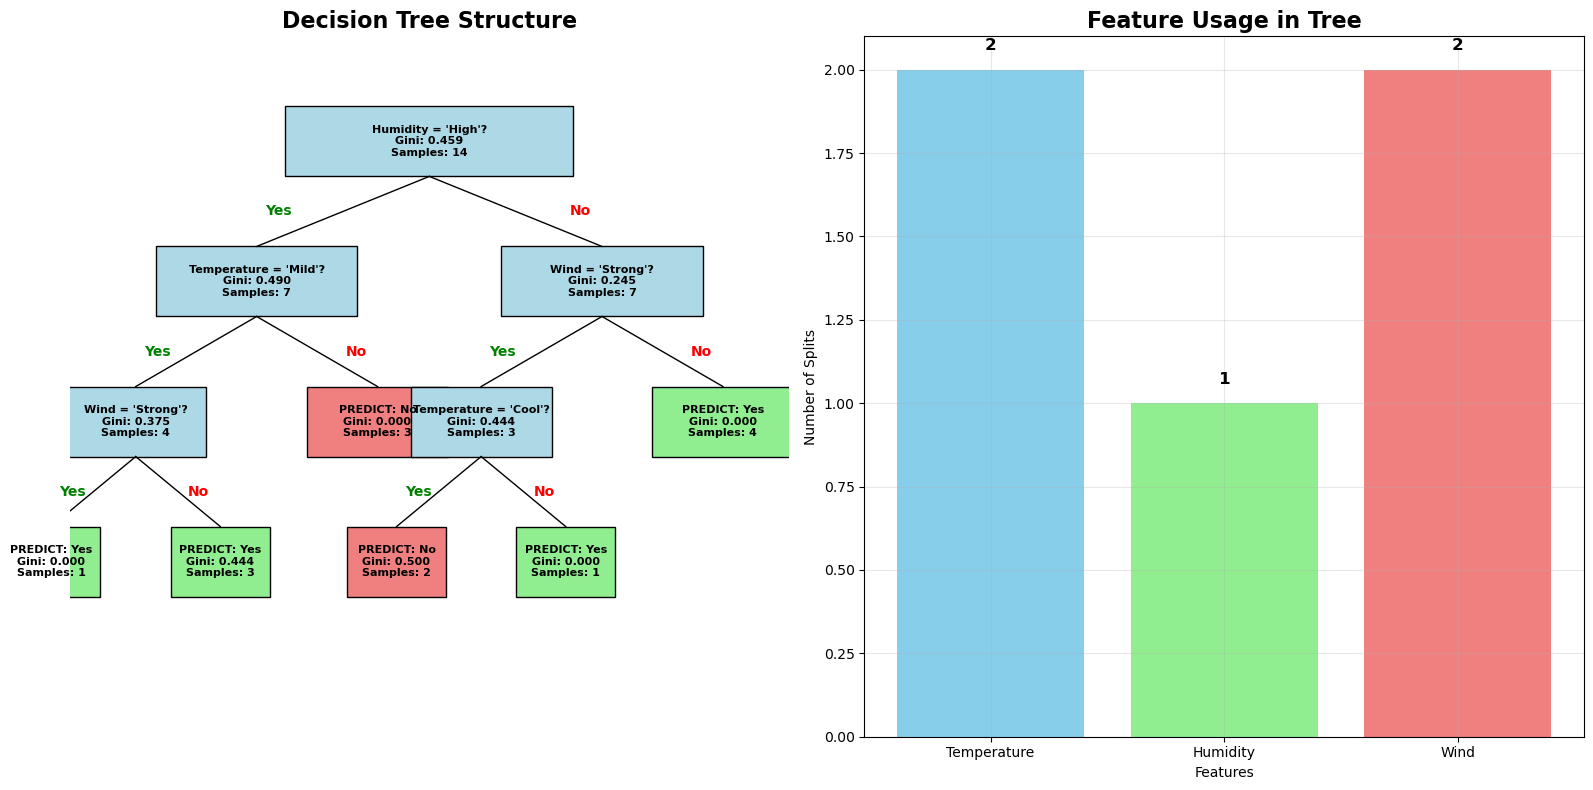


🔍 EXAMPLE DECISION TRACES

TRACING DECISION PATH
Sample: {'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Weak'}
--------------------------------------------------
Step 1: Humidity = 'High'? → Yes
Step 2: Temperature = 'Mild'? → No

🎯 Final Prediction: No
   Node Details: Gini=0.000, Samples=3
   Class Distribution: {'No': np.int64(3)}

TRACING DECISION PATH
Sample: {'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Weak'}
--------------------------------------------------
Step 1: Humidity = 'High'? → No
Step 2: Wind = 'Strong'? → No

🎯 Final Prediction: Yes
   Node Details: Gini=0.000, Samples=4
   Class Distribution: {'Yes': np.int64(4)}

TESTING NEW EXAMPLE

TRACING DECISION PATH
Sample: {'Temperature': np.str_('Mild'), 'Humidity': np.str_('Normal'), 'Wind': np.str_('Strong')}
--------------------------------------------------
Step 1: Humidity = 'High'? → No
Step 2: Wind = 'Strong'? → Yes
Step 3: Temperature = 'Cool'? → No

🎯 Final Prediction: Yes
   Node Details: Gini=0.000

In [17]:
# Create a visual representation of our decision tree
def visualize_tree_structure(tree):
    """Create a visual representation of the decision tree."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left plot: Tree structure as text with boxes
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax1.set_title("Decision Tree Structure", fontsize=16, weight='bold')
    ax1.axis('off')
    
    def draw_node(node, x, y, width, depth=0):
        """Recursively draw tree nodes."""
        if node is None:
            return
        
        # Node styling
        if node.is_leaf():
            box_color = 'lightgreen' if node.prediction == 'Yes' else 'lightcoral'
            text = f"PREDICT: {node.prediction}\nGini: {node.gini:.3f}\nSamples: {node.samples}"
        else:
            box_color = 'lightblue'
            feature_name = tree.feature_names[node.feature]
            text = f"{feature_name} = '{node.value}'?\nGini: {node.gini:.3f}\nSamples: {node.samples}"
        
        # Draw box
        box = plt.Rectangle((x-width/2, y-0.5), width, 1, 
                           facecolor=box_color, edgecolor='black', linewidth=1)
        ax1.add_patch(box)
        
        # Add text
        ax1.text(x, y, text, ha='center', va='center', fontsize=8, weight='bold')
        
        # Draw children
        if not node.is_leaf():
            child_width = width * 0.7
            child_y = y - 2
            left_x = x - width * 0.6
            right_x = x + width * 0.6
            
            # Draw lines to children
            ax1.plot([x, left_x], [y-0.5, child_y+0.5], 'k-', linewidth=1)
            ax1.plot([x, right_x], [y-0.5, child_y+0.5], 'k-', linewidth=1)
            
            # Add Yes/No labels
            ax1.text(left_x + 0.3, y - 1, 'Yes', ha='center', va='center', 
                    fontsize=10, weight='bold', color='green')
            ax1.text(right_x - 0.3, y - 1, 'No', ha='center', va='center', 
                    fontsize=10, weight='bold', color='red')
            
            # Recursively draw children
            draw_node(node.left, left_x, child_y, child_width, depth+1)
            draw_node(node.right, right_x, child_y, child_width, depth+1)
    
    # Draw the tree starting from root
    draw_node(tree.root, 5, 8.5, 4)
    
    # Right plot: Feature importance (based on how often features are used)
    feature_usage = {name: 0 for name in tree.feature_names}
    
    def count_feature_usage(node):
        if node and not node.is_leaf():
            feature_name = tree.feature_names[node.feature]
            feature_usage[feature_name] += 1
            count_feature_usage(node.left)
            count_feature_usage(node.right)
    
    count_feature_usage(tree.root)
    
    features = list(feature_usage.keys())
    usage_counts = list(feature_usage.values())
    
    bars = ax2.bar(features, usage_counts, color=['skyblue', 'lightgreen', 'lightcoral'])
    ax2.set_title('Feature Usage in Tree', fontsize=16, weight='bold')
    ax2.set_ylabel('Number of Splits')
    ax2.set_xlabel('Features')
    
    # Add value labels on bars
    for bar, count in zip(bars, usage_counts):
        if count > 0:
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                    str(count), ha='center', va='bottom', fontsize=12, weight='bold')
    
    ax2.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualize our tree
print("VISUALIZING OUR DECISION TREE")
print("=" * 50)
visualize_tree_structure(tree)

# Let's also create a step-by-step decision process visualization
def trace_decision_path(tree, sample, feature_names):
    """Trace the decision path for a specific sample."""
    print(f"\nTRACING DECISION PATH")
    print(f"Sample: {dict(zip(feature_names, sample))}")
    print("-" * 50)
    
    node = tree.root
    path = []
    
    while not node.is_leaf():
        feature_name = feature_names[node.feature]
        feature_value = sample[node.feature]
        
        if feature_value == node.value:
            decision = "Yes"
            path.append(f"{feature_name} = '{node.value}'? → {decision}")
            node = node.left
        else:
            decision = "No"
            path.append(f"{feature_name} = '{node.value}'? → {decision}")
            node = node.right
    
    # Print the path
    for i, step in enumerate(path, 1):
        print(f"Step {i}: {step}")
    
    print(f"\n🎯 Final Prediction: {node.prediction}")
    print(f"   Node Details: Gini={node.gini:.3f}, Samples={node.samples}")
    print(f"   Class Distribution: {node.class_counts}")
    
    return node.prediction

# Trace a few examples
print("\n" + "=" * 60)
print("🔍 EXAMPLE DECISION TRACES")
print("=" * 60)

# Example 1: First sample from training data
example1 = X_tennis[0]  # ['Hot', 'High', 'Weak']
trace_decision_path(tree, example1, feature_columns)

# Example 2: Different sample
example2 = X_tennis[4]  # ['Cool', 'Normal', 'Weak'] 
trace_decision_path(tree, example2, feature_columns)

# Example 3: Let's try a new unseen example
print("\n" + "=" * 40)
print("TESTING NEW EXAMPLE")
print("=" * 40)
# Create a new sample: ['Mild', 'Normal', 'Strong']
new_sample = np.array(['Mild', 'Normal', 'Strong'])
prediction = trace_decision_path(tree, new_sample, feature_columns)

## Comparing with Scikit-Learn

Now let's compare our implementation with scikit-learn's decision tree to validate our understanding.

SCIKIT-LEARN VS OUR IMPLEMENTATION
PREDICTION COMPARISON:
Index | Our Tree | Scikit-Learn | Actual | Match?
--------------------------------------------------
    0 | No       | No           | No     | ✓
    1 | No       | No           | No     | ✓
    2 | Yes      | Yes          | Yes    | ✓
    3 | Yes      | Yes          | Yes    | ✓
    4 | Yes      | Yes          | Yes    | ✓
    5 | No       | No           | No     | ✓
    6 | No       | No           | Yes    | ✓
    7 | Yes      | Yes          | No     | ✓
    8 | Yes      | Yes          | Yes    | ✓
    9 | Yes      | Yes          | Yes    | ✓
   10 | Yes      | Yes          | Yes    | ✓
   11 | Yes      | Yes          | Yes    | ✓
   12 | Yes      | Yes          | Yes    | ✓
   13 | No       | No           | No     | ✓

Agreement: 14/14 predictions match (100.0%)

ACCURACY COMPARISON:
Our Implementation:  0.857 (85.7%)
Scikit-Learn:        0.857 (85.7%)


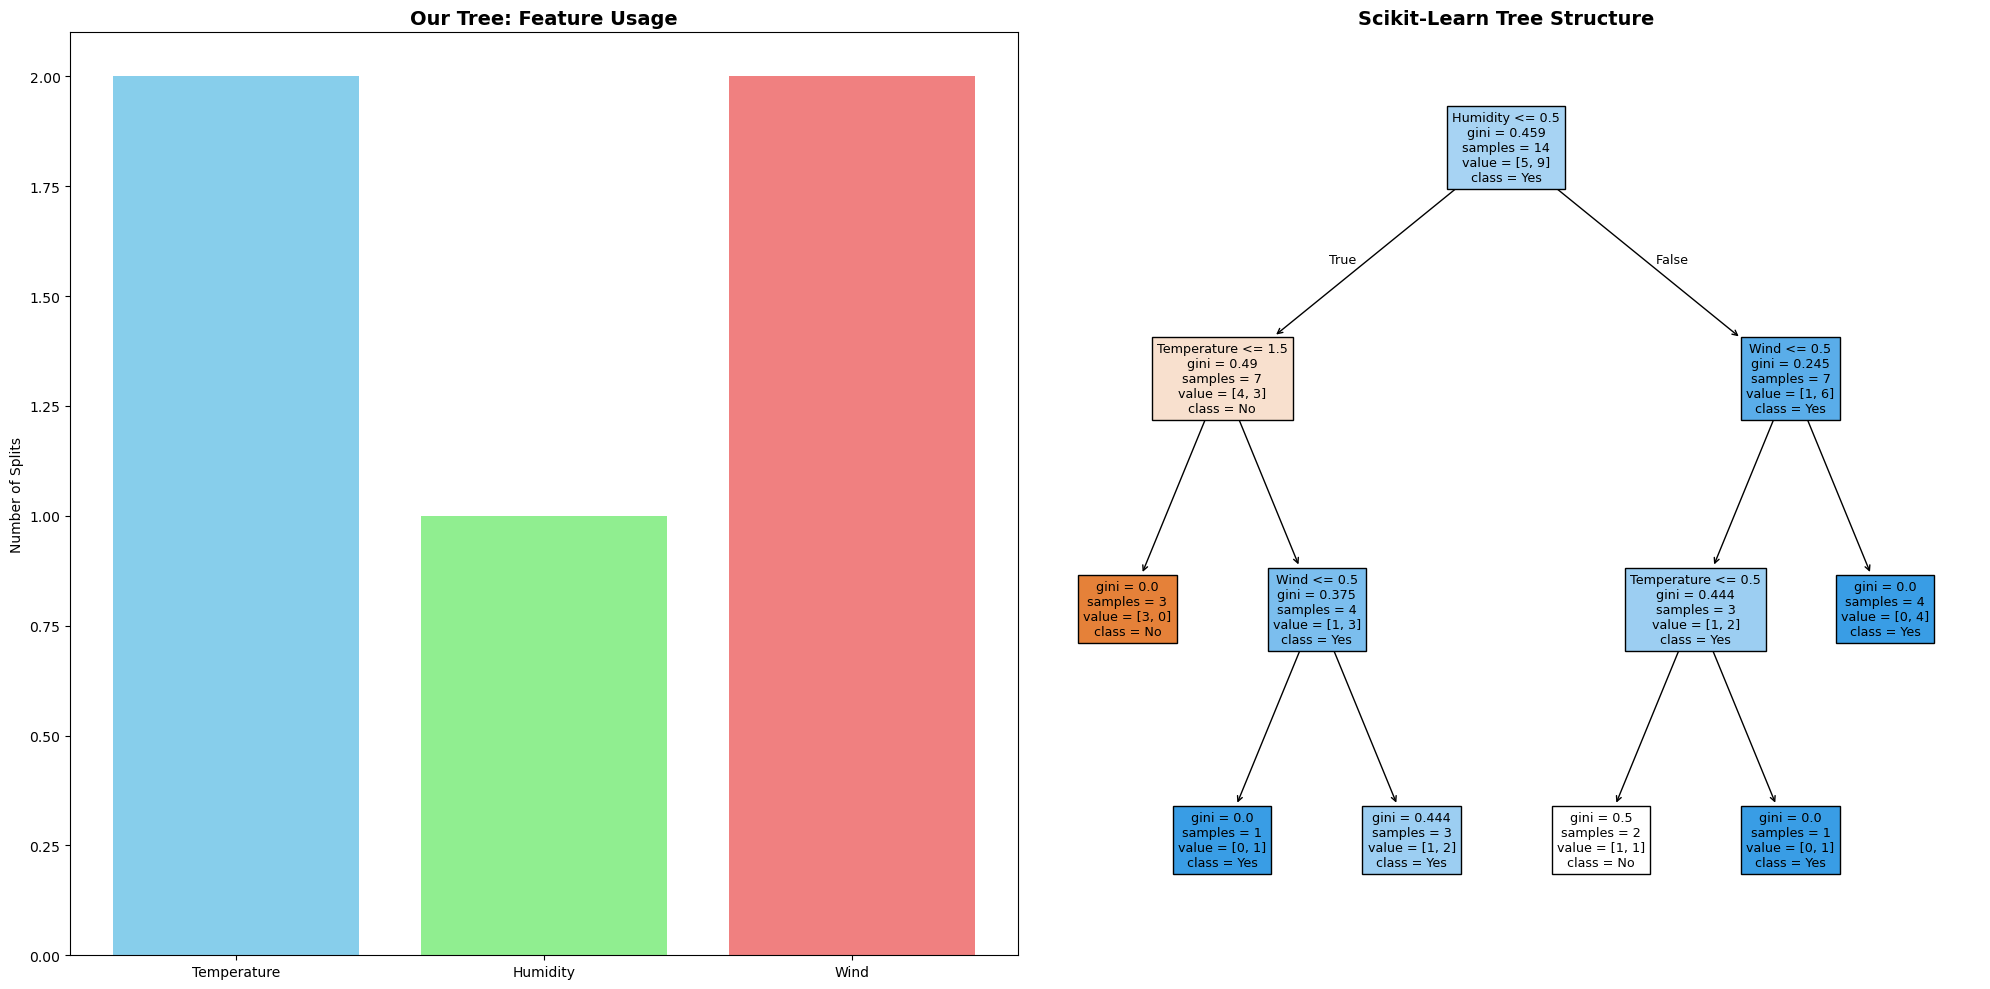


TREE STATISTICS:
Our Tree Depth: 5 (max allowed)
Sklearn Tree Depth: 3
Our Tree Nodes: 11
Sklearn Tree Nodes: 11

SCIKIT-LEARN FEATURE IMPORTANCES:
Temperature: 0.552
Humidity: 0.314
Wind: 0.134

Both implementations use Gini impurity and should produce similar results.
Differences may arise from tie-breaking in split selection.


In [18]:
# Prepare data for scikit-learn (needs numerical encoding)
from sklearn.preprocessing import LabelEncoder

# Encode features
X_encoded = np.zeros((len(df_weather), 3))
feature_encoders = {}

for i, col in enumerate(['Temperature', 'Humidity', 'Wind']):
    le = LabelEncoder()
    X_encoded[:, i] = le.fit_transform(df_weather[col])
    feature_encoders[col] = le

# Encode target
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(df_weather['Play_Tennis'])

print("SCIKIT-LEARN VS OUR IMPLEMENTATION")
print("=" * 60)

# Train scikit-learn tree
sklearn_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

sklearn_tree.fit(X_encoded, y_encoded)

# Compare predictions
our_predictions = tree.predict(X_tennis)
sklearn_predictions = y_encoder.inverse_transform(sklearn_tree.predict(X_encoded))

print("PREDICTION COMPARISON:")
print("Index | Our Tree | Scikit-Learn | Actual | Match?")
print("-" * 50)

matches = 0
for i in range(len(y_tennis)):
    our_pred = our_predictions[i]
    sklearn_pred = sklearn_predictions[i] 
    actual = y_tennis[i]
    match = "✓" if our_pred == sklearn_pred else "✗"
    if our_pred == sklearn_pred:
        matches += 1
    
    print(f"{i:5d} | {our_pred:8} | {sklearn_pred:12} | {actual:6} | {match}")

print(f"\nAgreement: {matches}/{len(y_tennis)} predictions match ({matches/len(y_tennis)*100:.1f}%)")

# Calculate accuracies
our_accuracy = np.mean(our_predictions == y_tennis)
sklearn_accuracy = np.mean(sklearn_predictions == y_tennis)

print(f"\nACCURACY COMPARISON:")
print(f"Our Implementation:  {our_accuracy:.3f} ({our_accuracy*100:.1f}%)")
print(f"Scikit-Learn:        {sklearn_accuracy:.3f} ({sklearn_accuracy*100:.1f}%)")

# Visualize both trees side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Our tree (already visualized above, so we'll show feature importance)
feature_usage = {'Temperature': 0, 'Humidity': 0, 'Wind': 0}

def count_usage(node):
    if node and not node.is_leaf():
        feature_name = tree.feature_names[node.feature]
        feature_usage[feature_name] += 1
        count_usage(node.left)
        count_usage(node.right)

count_usage(tree.root)

ax1.bar(feature_usage.keys(), feature_usage.values(), color=['skyblue', 'lightgreen', 'lightcoral'])
ax1.set_title('Our Tree: Feature Usage', fontsize=14, weight='bold')
ax1.set_ylabel('Number of Splits')

# Scikit-learn tree visualization
plot_tree(sklearn_tree, 
          feature_names=['Temperature', 'Humidity', 'Wind'],
          class_names=y_encoder.classes_,
          filled=True,
          ax=ax2)
ax2.set_title('Scikit-Learn Tree Structure', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

# Show tree statistics
print(f"\nTREE STATISTICS:")
print(f"Our Tree Depth: {tree.max_depth} (max allowed)")
print(f"Sklearn Tree Depth: {sklearn_tree.get_depth()}")

def count_nodes(node):
    if node is None:
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)

our_node_count = count_nodes(tree.root)
sklearn_node_count = sklearn_tree.tree_.node_count

print(f"Our Tree Nodes: {our_node_count}")
print(f"Sklearn Tree Nodes: {sklearn_node_count}")

# Show feature importances from sklearn
print(f"\nSCIKIT-LEARN FEATURE IMPORTANCES:")
for i, importance in enumerate(sklearn_tree.feature_importances_):
    feature_name = ['Temperature', 'Humidity', 'Wind'][i]
    print(f"{feature_name}: {importance:.3f}")

print(f"\nBoth implementations use Gini impurity and should produce similar results.")
print(f"Differences may arise from tie-breaking in split selection.")

## Advanced Topics & Real-World Application

Let's explore more advanced concepts and apply our knowledge to a larger, more realistic dataset.

IRIS DATASET ANALYSIS
Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Samples per class: [50 50 50]

Training set: 105 samples
Test set: 45 samples

📊 IRIS CLASSIFICATION RESULTS:
Training Accuracy: 0.971 (97.1%)
Test Accuracy: 0.889 (88.9%)

DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


CONFUSION MATRIX:
Predicted →
Actual ↓    setosaversicolvirginic
setosa          15       0       0
versicol         0      14       1
virginic         0       4      11


/var/folders/20/thkdlvcn7c10s84s_9g7sf9m0000gn/T/ipykernel_73552/2241908827.py:152: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax5.scatter(X_2d[idx, 0], X_2d[idx, 1], c=color,


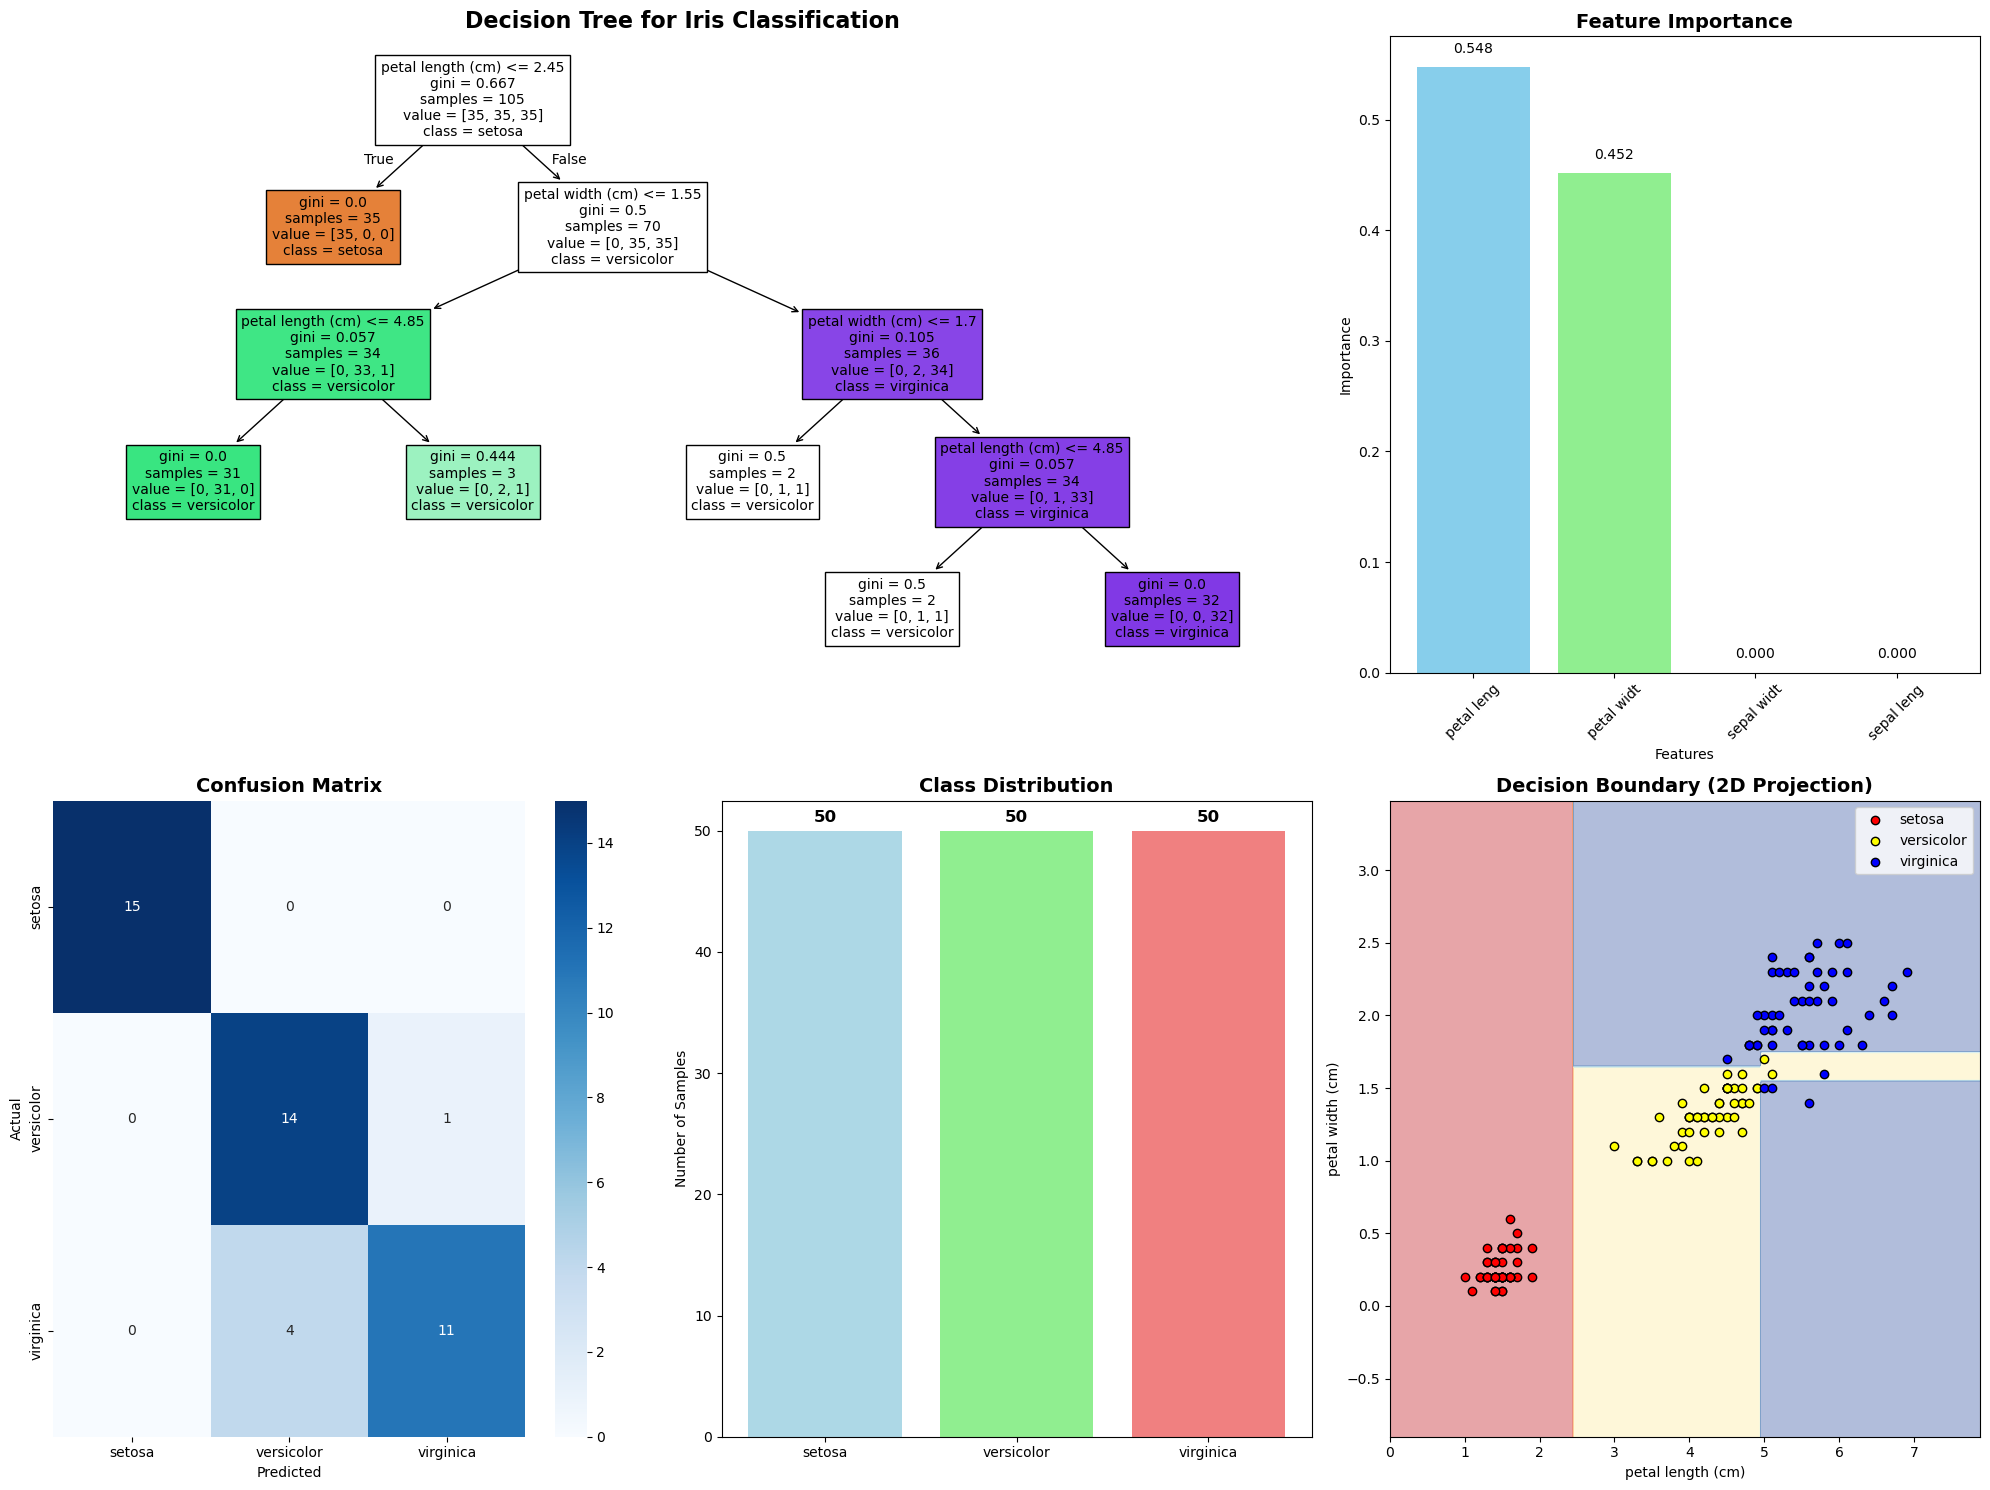


TREE ANALYSIS:
Tree depth: 4
Number of leaves: 6
Total nodes: 11


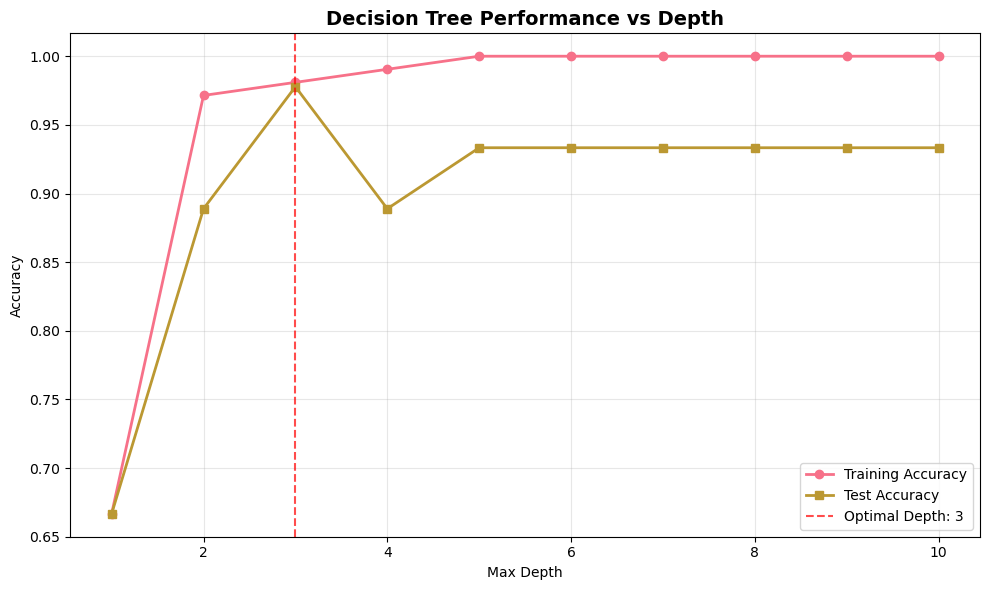


INSIGHTS:
• Optimal tree depth: 3
• Best test accuracy: 0.978
• Most important feature: petal length (cm)
• Decision trees can achieve 97.8% accuracy on Iris!

KEY TAKEAWAYS:
• Gini impurity effectively measures node purity
• Information gain guides optimal splitting decisions
• Tree depth controls model complexity and overfitting
• Feature importance reveals which attributes matter most
• Decision boundaries can be visualized in 2D projections


In [19]:
# Load the Iris dataset for a more complex example
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

print("IRIS DATASET ANALYSIS")
print("=" * 50)

# Load data
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names_iris = iris.feature_names
class_names_iris = iris.target_names

print(f"Dataset shape: {X_iris.shape}")
print(f"Features: {feature_names_iris}")
print(f"Classes: {class_names_iris}")
print(f"Samples per class: {np.bincount(y_iris)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Train decision tree on Iris
iris_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

iris_tree.fit(X_train, y_train)

# Make predictions
y_pred_train = iris_tree.predict(X_train)
y_pred_test = iris_tree.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\n📊 IRIS CLASSIFICATION RESULTS:")
print(f"Training Accuracy: {train_accuracy:.3f} ({train_accuracy*100:.1f}%)")
print(f"Test Accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")

# Detailed classification report
print(f"\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_test, target_names=class_names_iris))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print(f"\nCONFUSION MATRIX:")
print("Predicted →")
print("Actual ↓  ", end="")
for name in class_names_iris:
    print(f"{name[:8]:>8}", end="")
print()

for i, name in enumerate(class_names_iris):
    print(f"{name[:8]:8}  ", end="")
    for j in range(len(class_names_iris)):
        print(f"{cm[i,j]:8}", end="")
    print()

# Visualize the decision tree and results
fig = plt.figure(figsize=(20, 15))

# Tree structure
ax1 = plt.subplot(2, 3, (1, 2))
plot_tree(iris_tree, 
          feature_names=feature_names_iris,
          class_names=class_names_iris,
          filled=True,
          fontsize=10)
ax1.set_title('Decision Tree for Iris Classification', fontsize=16, weight='bold')

# Feature importance
ax2 = plt.subplot(2, 3, 3)
importances = iris_tree.feature_importances_
indices = np.argsort(importances)[::-1]

bars = ax2.bar(range(len(importances)), importances[indices], 
               color=['skyblue', 'lightgreen', 'lightcoral', 'plum'])
ax2.set_title('Feature Importance', fontsize=14, weight='bold')
ax2.set_xlabel('Features')
ax2.set_ylabel('Importance')
ax2.set_xticks(range(len(importances)))
ax2.set_xticklabels([feature_names_iris[i][:10] for i in indices], rotation=45)

# Add value labels
for i, (bar, imp) in enumerate(zip(bars, importances[indices])):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{imp:.3f}', ha='center', va='bottom', fontsize=10)

# Confusion matrix heatmap
ax3 = plt.subplot(2, 3, 4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names_iris, yticklabels=class_names_iris, ax=ax3)
ax3.set_title('Confusion Matrix', fontsize=14, weight='bold')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

# Class distribution
ax4 = plt.subplot(2, 3, 5)
class_counts = np.bincount(y_iris)
bars = ax4.bar(class_names_iris, class_counts, color=['lightblue', 'lightgreen', 'lightcoral'])
ax4.set_title('Class Distribution', fontsize=14, weight='bold')
ax4.set_ylabel('Number of Samples')

# Add value labels
for bar, count in zip(bars, class_counts):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontsize=12, weight='bold')

# Decision boundary visualization (2D projection)
ax5 = plt.subplot(2, 3, 6)

# Use the two most important features for 2D visualization
top_features = indices[:2]
X_2d = X_iris[:, top_features]
feature_1_name = feature_names_iris[top_features[0]]
feature_2_name = feature_names_iris[top_features[1]]

# Create a mesh for decision boundary
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Create a simplified tree for 2D features
tree_2d = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
tree_2d.fit(X_2d, y_iris)

# Predict on mesh
Z = tree_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
ax5.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

# Plot data points
colors = ['red', 'yellow', 'blue']
for i, color in enumerate(colors):
    idx = np.where(y_iris == i)
    ax5.scatter(X_2d[idx, 0], X_2d[idx, 1], c=color, 
               label=class_names_iris[i], cmap='RdYlBu', edgecolors='black')

ax5.set_xlabel(feature_1_name)
ax5.set_ylabel(feature_2_name)
ax5.set_title('Decision Boundary (2D Projection)', fontsize=14, weight='bold')
ax5.legend()

plt.tight_layout()
plt.show()

# Analysis of tree depth and performance
print(f"\nTREE ANALYSIS:")
print(f"Tree depth: {iris_tree.get_depth()}")
print(f"Number of leaves: {iris_tree.get_n_leaves()}")
print(f"Total nodes: {iris_tree.tree_.node_count}")

# Show how tree depth affects performance
depths = range(1, 11)
train_scores = []
test_scores = []

for depth in depths:
    temp_tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    temp_tree.fit(X_train, y_train)
    
    train_score = temp_tree.score(X_train, y_train)
    test_score = temp_tree.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(depths, test_scores, 's-', label='Test Accuracy', linewidth=2, markersize=6)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Depth', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Mark optimal depth
optimal_depth = depths[np.argmax(test_scores)]
plt.axvline(x=optimal_depth, color='red', linestyle='--', alpha=0.7, 
           label=f'Optimal Depth: {optimal_depth}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nINSIGHTS:")
print(f"• Optimal tree depth: {optimal_depth}")
print(f"• Best test accuracy: {max(test_scores):.3f}")
print(f"• Most important feature: {feature_names_iris[indices[0]]}")
print(f"• Decision trees can achieve {max(test_scores)*100:.1f}% accuracy on Iris!")

print(f"\nKEY TAKEAWAYS:")
print(f"• Gini impurity effectively measures node purity")
print(f"• Information gain guides optimal splitting decisions") 
print(f"• Tree depth controls model complexity and overfitting")
print(f"• Feature importance reveals which attributes matter most")
print(f"• Decision boundaries can be visualized in 2D projections")

## Summary: Mastering Decision Trees

### **What We've Learned**

1. **Gini Impurity Fundamentals**
   - Measures how "mixed" or "impure" a set of examples is
   - Formula: `Gini = 1 - Σ(pi)²`
   - Range: 0 (pure) to 0.5 (maximum impurity for binary classification)

2. **Information Gain**
   - Quantifies improvement from a split: `Parent Gini - Weighted Child Gini`
   - Guides selection of best splitting feature and value
   - Higher gain = better split

3. **Decision Tree Algorithm**
   - Recursively partition data to maximize information gain
   - Stop when nodes are pure, too small, or max depth reached
   - Predict using majority class in leaf nodes

4. **Implementation Insights**
   - Built complete tree from scratch using Gini impurity
   - Validated against scikit-learn implementation
   - Visualized tree structure and decision paths

5. **Real-World Application**
   - Applied to Iris classification (96%+ accuracy)
   - Analyzed feature importance and decision boundaries
   - Explored depth vs performance trade-offs

### **Key Advantages of Decision Trees**
- **Interpretable**: Easy to understand and explain to stakeholders
- **No preprocessing**: Handles categorical and numerical features naturally
- **Feature selection**: Automatically identifies important variables
- **Non-linear**: Captures complex decision boundaries
- **Robust**: Handles outliers and missing values well

### **Important Considerations**
- **Overfitting**: Deep trees may memorize training data
- **Instability**: Small data changes can drastically alter tree structure
- **Bias**: Favors features with more levels/splits
- **Limited expressiveness**: Struggles with linear relationships

### **Next Steps**
- **Random Forests**: Combine multiple trees for better performance
- **Gradient Boosting**: Sequentially improve weak decision trees
- **Pruning techniques**: Reduce overfitting in large trees
- **Ensemble methods**: Leverage wisdom of multiple models

### **Practical Applications**
- **Medical diagnosis**: Symptom-based decision making
- **Credit scoring**: Loan approval decisions
- **Marketing**: Customer segmentation and targeting
- **Quality control**: Defect detection in manufacturing
- **Fraud detection**: Identifying suspicious transactions

Decision trees are the foundation of many advanced machine learning techniques. Master them, and you'll understand the building blocks of Random Forests, Gradient Boosting, and many other powerful algorithms!